In [17]:
import pandas as pd

data = pd.read_csv('weather_data_danang_15k.csv')
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m
0,2022-01-01T00:00,21.3,91,19.8,1020.5,0.2,0.0,0.0,51,100,8.2
1,2022-01-01T01:00,21.1,90,19.4,1020.0,0.5,0.0,0.0,53,100,5.9
2,2022-01-01T02:00,21.2,92,19.8,1019.1,0.1,0.0,0.0,51,100,4.3
3,2022-01-01T03:00,21.0,93,19.9,1018.3,0.8,0.0,0.0,53,100,6.0
4,2022-01-01T04:00,21.3,92,20.0,1018.1,0.8,0.0,0.0,53,100,7.7


In [8]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'showers', 'snow_depth', 'weather_code',
       'cloud_cover', 'wind_speed_10m'],
      dtype='object')

STT,Tên cột,Ý nghĩa,Đơn vị thường dùng

1,time,Thời gian ghi nhận dữ liệu,ISO 8601 (Ngày/Giờ)

2,temperature_2m, Nhiệt độ không khí tại độ cao 2m so với mặt đất,°C hoặc °F

3,relative_humidity_2m, Độ ẩm tương đối (lượng hơi nước hiện có so với mức bão hòa),%

4,dew_point_2m, Điểm sương (nhiệt độ mà tại đó hơi nước ngưng tụ thành nước),°C hoặc °F

5,surface_pressure, Áp suất khí quyển tại bề mặt,hPa hoặc mbar

6,rain,     "Lượng mưa ổn định (diện rộng, kéo dài)",mm

7,showers,  "Mưa rào (mưa cục bộ, cường độ mạnh, nhanh)",mm

8,snow_depth,   Độ dày lớp tuyết bao phủ trên mặt đất,cm hoặc m

9,weather_code, Mã trạng thái thời tiết (Theo chuẩn WMO),Số nguyên (Integer)

10,cloud_cover, Tổng lượng mây che phủ bầu trời,%

11,wind_speed_10m,  Tốc độ gió tại độ cao tiêu chuẩn 10m,km/h hoặc m/s

In [9]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].isnull().sum()}")

time: 0
temperature_2m: 0
relative_humidity_2m: 0
dew_point_2m: 0
surface_pressure: 0
rain: 0
showers: 0
snow_depth: 0
weather_code: 0
cloud_cover: 0
wind_speed_10m: 0


In [10]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].value_counts()}")

time: time
2022-01-01T00:00    1
2022-01-01T01:00    1
2022-01-01T02:00    1
2022-01-01T03:00    1
2022-01-01T04:00    1
                   ..
2023-09-30T19:00    1
2023-09-30T20:00    1
2023-09-30T21:00    1
2023-09-30T22:00    1
2023-09-30T23:00    1
Name: count, Length: 15312, dtype: int64
temperature_2m: temperature_2m
27.0    288
26.5    286
26.0    275
25.5    252
27.5    250
       ... 
39.7      1
38.4      1
39.0      1
36.9      1
37.6      1
Name: count, Length: 227, dtype: int64
relative_humidity_2m: relative_humidity_2m
90    685
84    673
85    669
89    666
87    664
     ... 
40      5
35      4
33      3
32      1
34      1
Name: count, Length: 69, dtype: int64
dew_point_2m: dew_point_2m
24.5    591
25.0    521
24.0    482
23.5    403
24.4    387
       ... 
13.4      1
13.1      1
13.5      1
28.2      1
28.8      1
Name: count, Length: 162, dtype: int64
surface_pressure: surface_pressure
1005.2    156
1004.4    140
1005.9    138
1005.7    135
1007.1    131
         .

In [11]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].unique()}")

time: ['2022-01-01T00:00' '2022-01-01T01:00' '2022-01-01T02:00' ...
 '2023-09-30T21:00' '2023-09-30T22:00' '2023-09-30T23:00']
temperature_2m: [21.3 21.1 21.2 21.  21.5 21.8 22.2 23.  23.6 24.1 23.3 23.8 22.9 22.5
 21.9 22.3 21.4 22.  22.8 22.6 22.4 21.7 22.1 21.6 23.2 23.5 23.1 20.6
 20.5 19.8 19.6 19.2 19.5 20.  19.7 23.4 23.7 24.  23.9 22.7 24.5 24.8
 24.9 25.  24.2 20.9 20.8 24.3 24.6 24.7 24.4 20.4 20.3 20.7 20.2 19.4
 19.1 18.7 18.6 25.1 20.1 25.5 26.2 26.  25.6 25.7 25.4 25.2 25.3 19.9
 25.9 25.8 26.6 27.3 27.6 26.7 26.4 26.3 27.2 27.4 26.9 27.  26.5 18.9
 18.4 18.2 18.5 18.  18.1 19.3 19.  18.3 18.8 17.9 26.1 26.8 27.5 28.1
 28.5 28.2 28.6 29.  28.8 28.9 28.4 28.  29.2 27.8 28.3 27.1 29.3 30.
 29.8 29.4 30.3 30.2 30.1 29.5 27.7 29.9 29.6 29.7 29.1 27.9 30.4 30.5
 31.  30.9 30.8 31.2 31.5 31.4 32.3 33.4 33.5 32.8 30.6 31.3 30.7 31.1
 28.7 31.8 31.7 31.9 32.2 32.9 32.  31.6 33.2 33.6 33.9 33.8 32.5 34.9
 36.  34.6 35.2 35.  32.6 33.  34.1 34.2 34.  32.7 32.4 33.3 34.7 35.3
 35.8 

In [18]:
data = data.drop(columns=['showers', 'snow_depth'])
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m
0,2022-01-01T00:00,21.3,91,19.8,1020.5,0.2,51,100,8.2
1,2022-01-01T01:00,21.1,90,19.4,1020.0,0.5,53,100,5.9
2,2022-01-01T02:00,21.2,92,19.8,1019.1,0.1,51,100,4.3
3,2022-01-01T03:00,21.0,93,19.9,1018.3,0.8,53,100,6.0
4,2022-01-01T04:00,21.3,92,20.0,1018.1,0.8,53,100,7.7


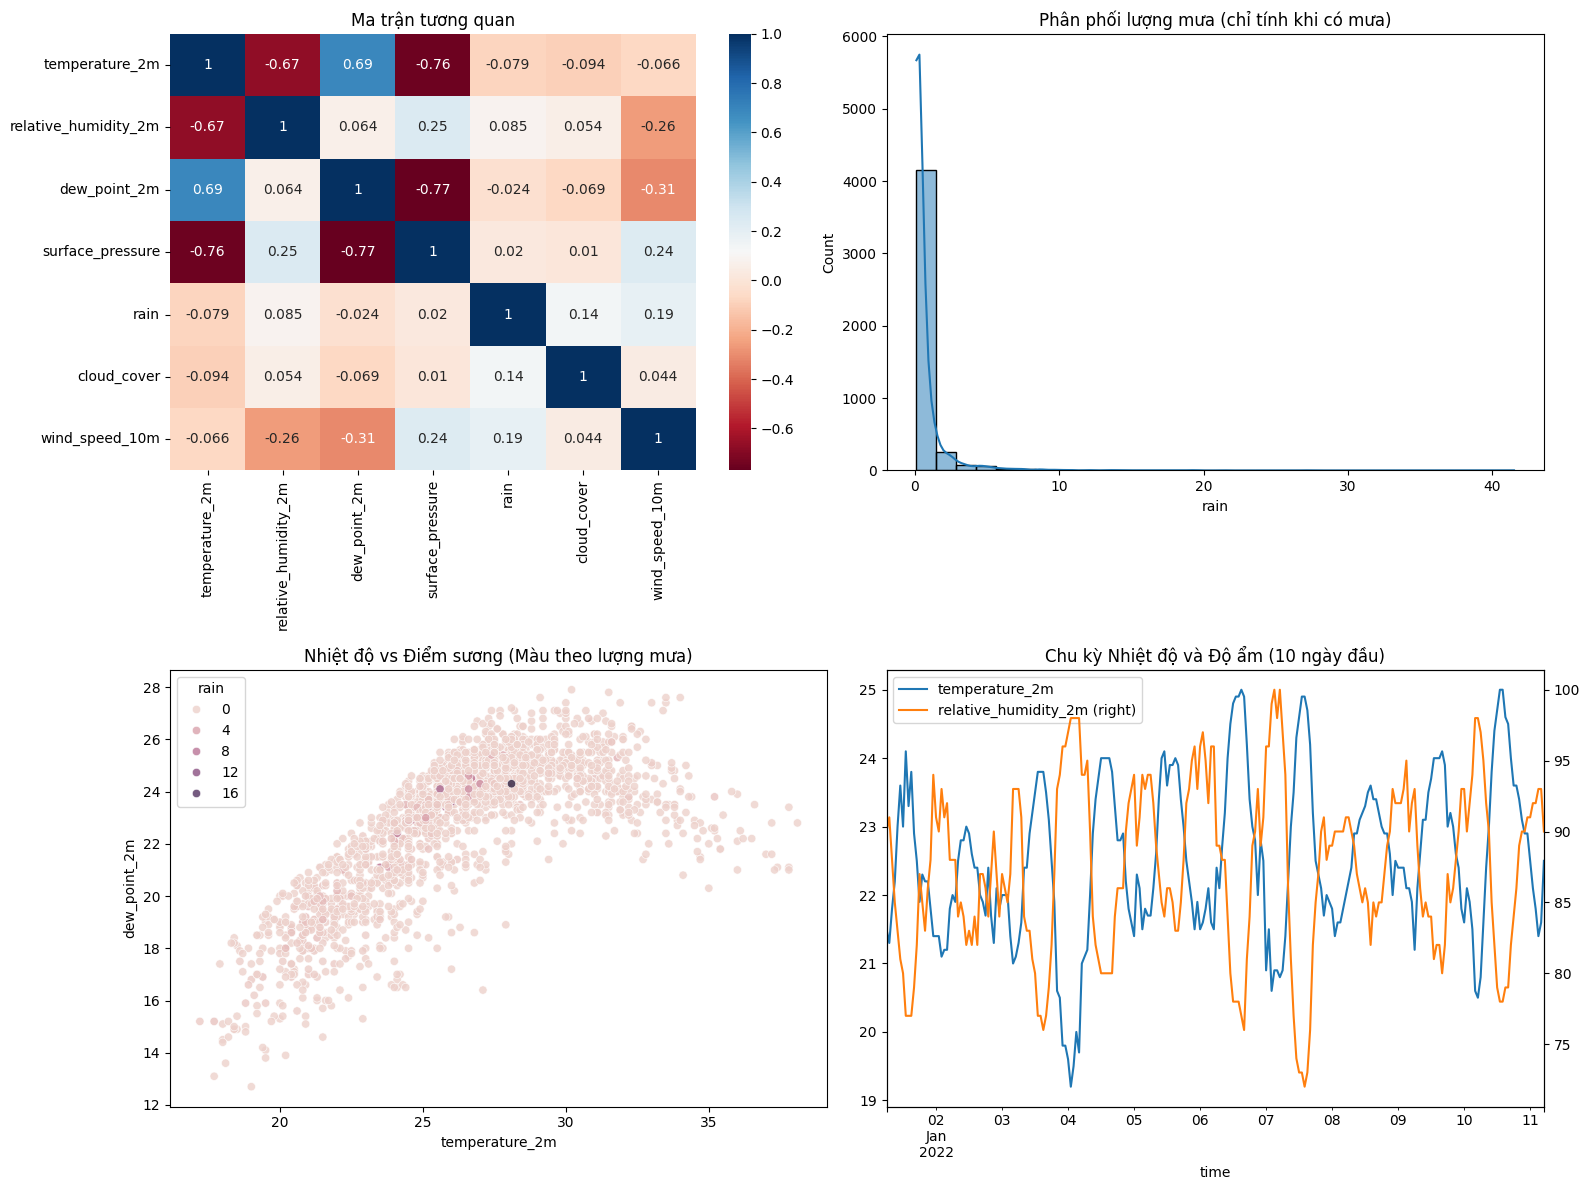

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cols_to_viz = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'rain', 'cloud_cover', 'wind_speed_10m']
sns.heatmap(data[cols_to_viz].corr(), annot=True, cmap='RdBu', ax=axes[0,0])
axes[0,0].set_title("Ma trận tương quan")

sns.histplot(data[data['rain'] > 0]['rain'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Phân phối lượng mưa (chỉ tính khi có mưa)")

# 3. Quan hệ Temp vs Dew Point
sns.scatterplot(data=data.sample(2000), x='temperature_2m', y='dew_point_2m', hue='rain', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title("Nhiệt độ vs Điểm sương (Màu theo lượng mưa)")

data[:240].plot(x='time', y=['temperature_2m', 'relative_humidity_2m'], secondary_y='relative_humidity_2m', ax=axes[1,1])
axes[1,1].set_title("Chu kỳ Nhiệt độ và Độ ẩm (10 ngày đầu)")

plt.tight_layout()
plt.show()

C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\2343687222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='weather_group', y='dew_point_gap', palette='muted')


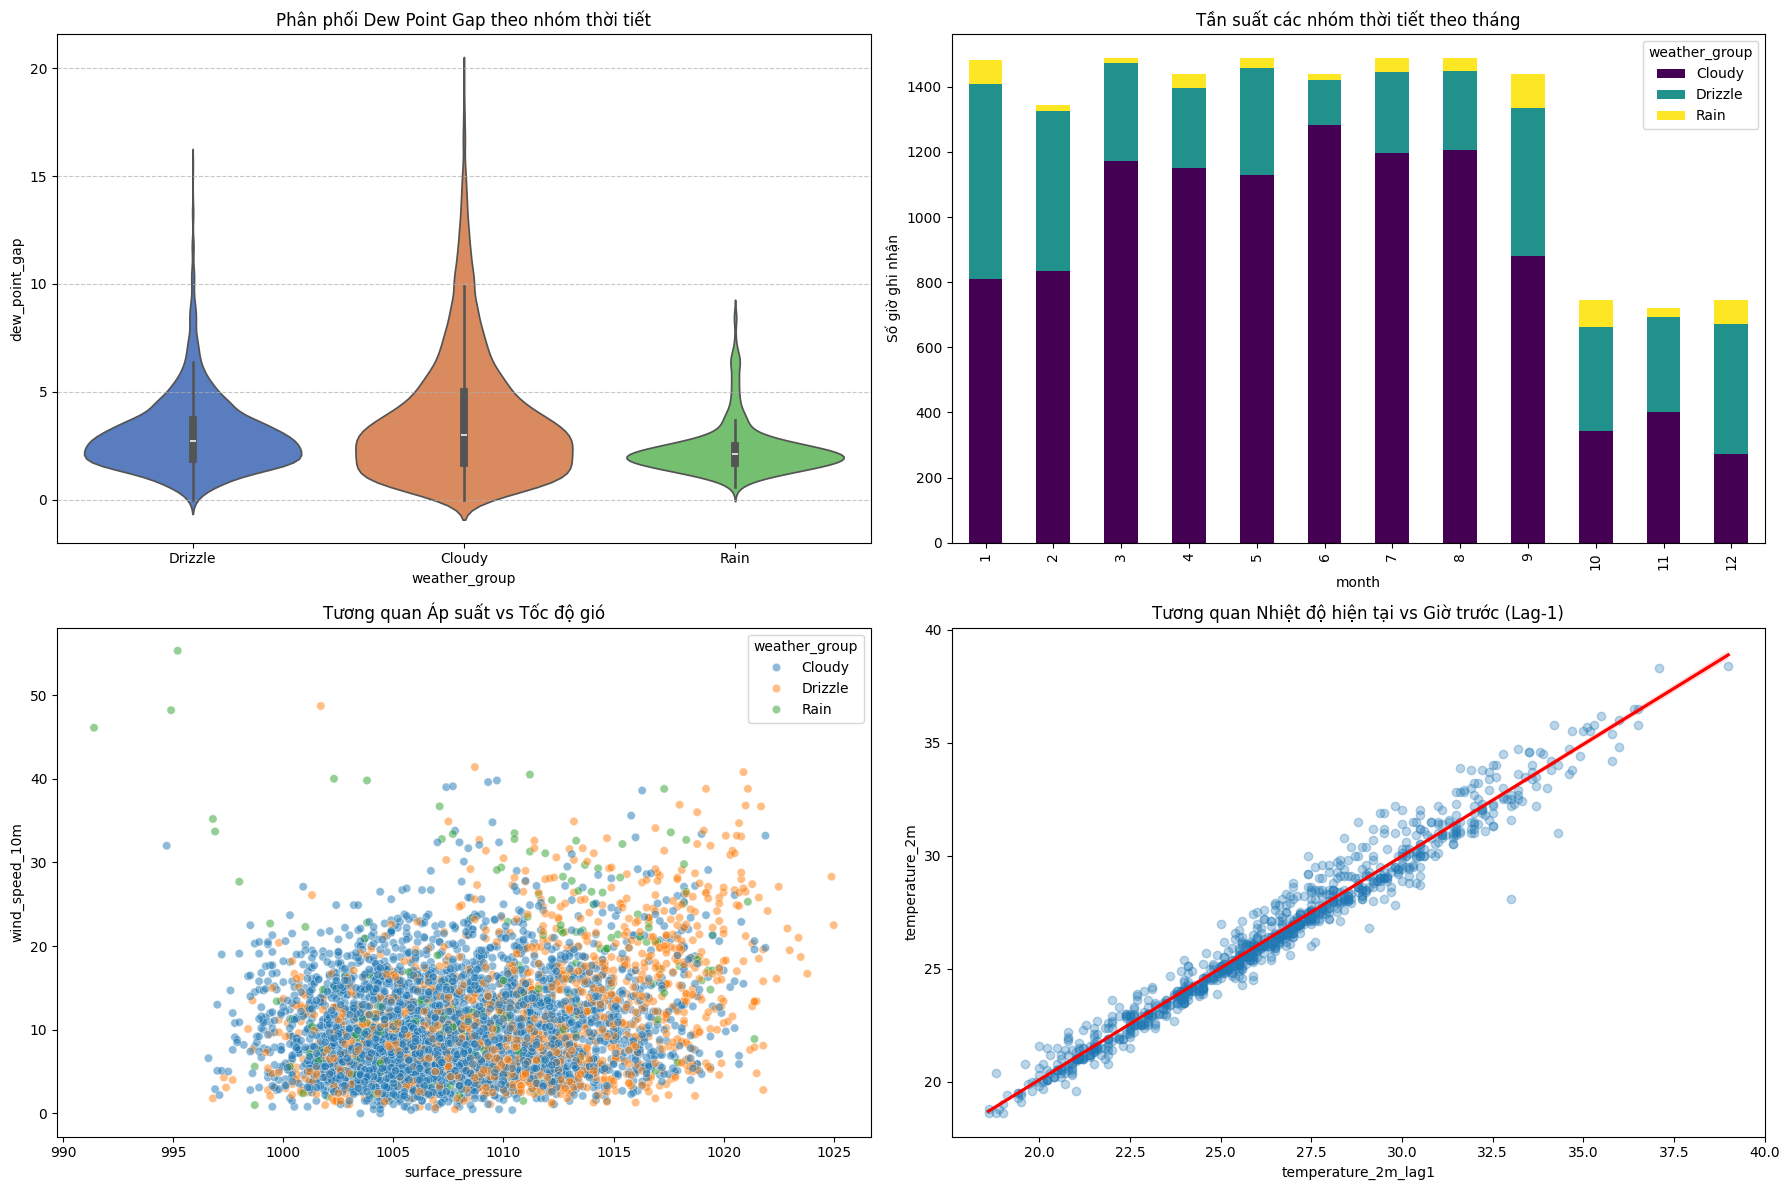

In [48]:
plt.figure(figsize=(18, 12))

# 1. Violin Plot cho Dew Point Gap (Kiểm tra đặc trưng quan trọng nhất)
plt.subplot(2, 2, 1)
sns.violinplot(data=data, x='weather_group', y='dew_point_gap', palette='muted')
plt.title("Phân phối Dew Point Gap theo nhóm thời tiết")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Biểu đồ cột chồng theo tháng (Tính mùa vụ tại Đà Nẵng)
plt.subplot(2, 2, 2)
monthly_weather = data.groupby(['month', 'weather_group']).size().unstack()
monthly_weather.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title("Tần suất các nhóm thời tiết theo tháng")
plt.ylabel("Số giờ ghi nhận")

# 3. Mối quan hệ giữa Gió và Áp suất (Nhận diện bão)
plt.subplot(2, 2, 3)
sns.scatterplot(data=data.sample(min(5000, len(data))), x='surface_pressure', y='wind_speed_10m', 
                hue='weather_group', alpha=0.5)
plt.title("Tương quan Áp suất vs Tốc độ gió")

# 4. Đặc trưng trễ (Lag Feature) - Kiểm tra tính liên tục
plt.subplot(2, 2, 4)
sns.regplot(data=data.sample(min(1000, len(data))), x='temperature_2m_lag1', y='temperature_2m', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Tương quan Nhiệt độ hiện tại vs Giờ trước (Lag-1)")

plt.tight_layout()
plt.show()

C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3761511108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='weather_group', y='surface_pressure', palette='Set2')
C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3761511108.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3761511108.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3761511108.py:24: FutureWarning: 

`shade` 

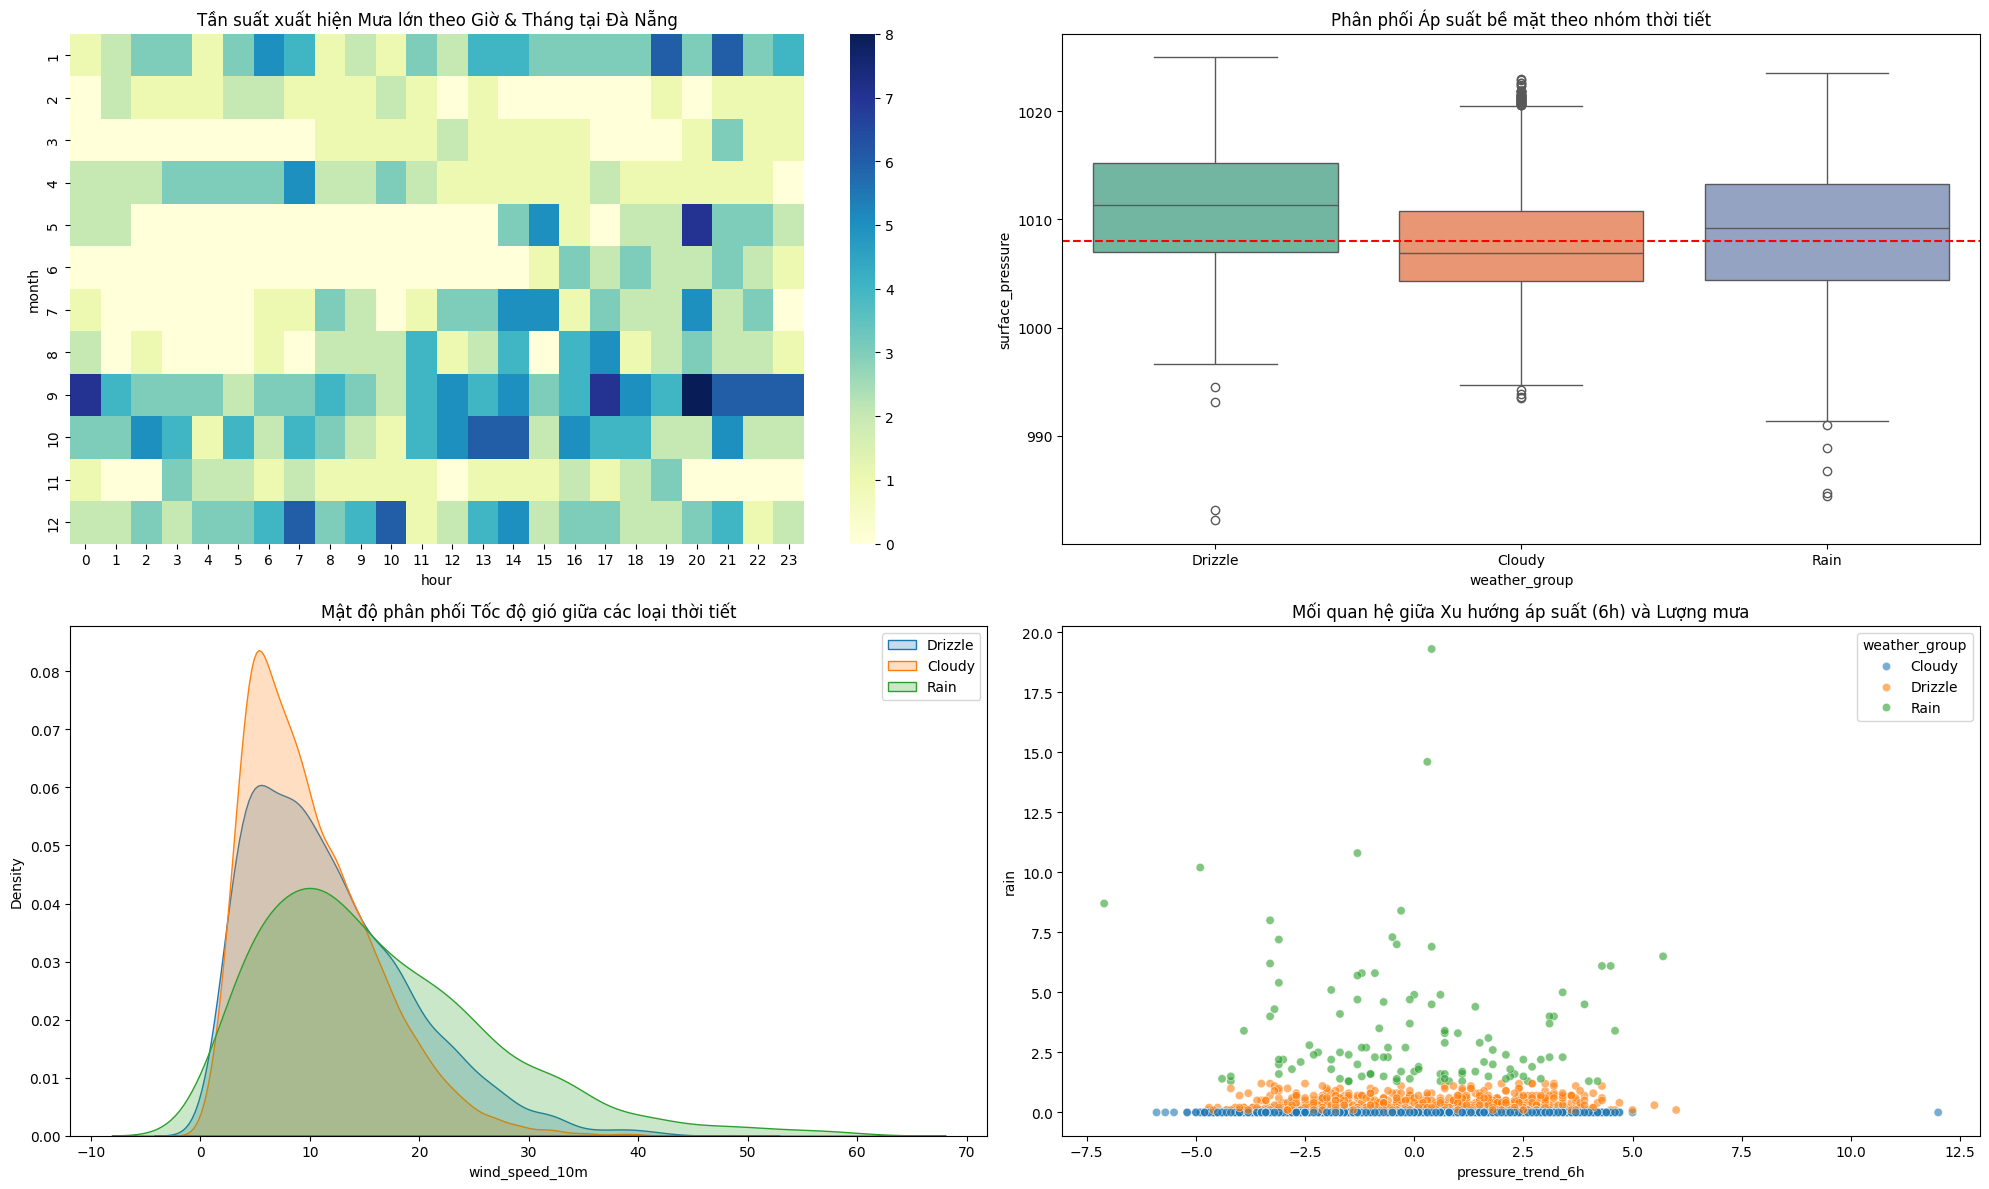

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))

# 1. Heatmap tần suất Mưa theo Giờ và Tháng
plt.subplot(2, 2, 1)
rain_freq = data[data['weather_group'] == 'Rain'].pivot_table(
    index='month', columns='hour', values='temperature_2m', aggfunc='count'
).fillna(0)
sns.heatmap(rain_freq, cmap='YlGnBu', annot=False)
plt.title("Tần suất xuất hiện Mưa lớn theo Giờ & Tháng tại Đà Nẵng")

# 2. Boxplot so sánh Áp suất giữa các nhóm (Tìm ngưỡng bão)
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='weather_group', y='surface_pressure', palette='Set2')
plt.axhline(y=1008, color='red', linestyle='--', label='Ngưỡng áp suất thấp') # Ví dụ ngưỡng
plt.title("Phân phối Áp suất bề mặt theo nhóm thời tiết")

# 3. Biểu đồ mật độ (KDE) cho Tốc độ gió
plt.subplot(2, 2, 3)
for group in data['weather_group'].unique():
    subset = data[data['weather_group'] == group]
    sns.kdeplot(subset['wind_speed_10m'], label=group, shade=True)
plt.title("Mật độ phân phối Tốc độ gió giữa các loại thời tiết")
plt.legend()

# 4. Tương quan giữa Biến động áp suất 6h và Lượng mưa
plt.subplot(2, 2, 4)
sns.scatterplot(data=data.sample(min(3000, len(data))), 
                x='pressure_trend_6h', y='rain', hue='weather_group', alpha=0.6)
plt.title("Mối quan hệ giữa Xu hướng áp suất (6h) và Lượng mưa")

plt.tight_layout()
plt.show()

In [ ]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,month
0,2022-01-01 00:00:00,21.3,91,19.8,1020.5,0.2,51,100,8.2,0,1
1,2022-01-01 01:00:00,21.1,90,19.4,1020.0,0.5,53,100,5.9,1,1
2,2022-01-01 02:00:00,21.2,92,19.8,1019.1,0.1,51,100,4.3,2,1
3,2022-01-01 03:00:00,21.0,93,19.9,1018.3,0.8,53,100,6.0,3,1
4,2022-01-01 04:00:00,21.3,92,20.0,1018.1,0.8,53,100,7.7,4,1


In [22]:
data['weather_code'].value_counts()

weather_code
3     6037
51    3149
0     1935
1     1523
2     1185
53     740
61     302
63     225
55     172
65      44
Name: count, dtype: int64

In [23]:
data.groupby('weather_code')['rain'].mean()

weather_code
0      0.000000
1      0.000000
2      0.000000
3      0.000000
51     0.176437
53     0.651081
55     1.093023
61     1.708609
63     4.076889
65    12.554545
Name: rain, dtype: float64

In [24]:
def group_weather(code):
    if code <= 3: return 'Cloudy'
    if code <= 55: return 'Drizzle'
    if code <= 65: return 'Rain'

data['weather_group'] = data['weather_code'].apply(group_weather)
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,month,weather_group
0,2022-01-01 00:00:00,21.3,91,19.8,1020.5,0.2,51,100,8.2,0,1,Drizzle
1,2022-01-01 01:00:00,21.1,90,19.4,1020.0,0.5,53,100,5.9,1,1,Drizzle
2,2022-01-01 02:00:00,21.2,92,19.8,1019.1,0.1,51,100,4.3,2,1,Drizzle
3,2022-01-01 03:00:00,21.0,93,19.9,1018.3,0.8,53,100,6.0,3,1,Drizzle
4,2022-01-01 04:00:00,21.3,92,20.0,1018.1,0.8,53,100,7.7,4,1,Drizzle


In [25]:
data['weather_group'].value_counts()

weather_group
Cloudy     10680
Drizzle     4061
Rain         571
Name: count, dtype: int64

In [26]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,month,weather_group
0,2022-01-01 00:00:00,21.3,91,19.8,1020.5,0.2,51,100,8.2,0,1,Drizzle
1,2022-01-01 01:00:00,21.1,90,19.4,1020.0,0.5,53,100,5.9,1,1,Drizzle
2,2022-01-01 02:00:00,21.2,92,19.8,1019.1,0.1,51,100,4.3,2,1,Drizzle
3,2022-01-01 03:00:00,21.0,93,19.9,1018.3,0.8,53,100,6.0,3,1,Drizzle
4,2022-01-01 04:00:00,21.3,92,20.0,1018.1,0.8,53,100,7.7,4,1,Drizzle
...,...,...,...,...,...,...,...,...,...,...,...,...
15307,2023-09-30 19:00:00,28.0,79,24.0,1007.8,0.0,0,10,7.7,19,9,Cloudy
15308,2023-09-30 20:00:00,27.5,85,24.8,1008.7,0.0,2,69,2.6,20,9,Cloudy
15309,2023-09-30 21:00:00,26.9,87,24.6,1009.5,0.1,51,81,6.9,21,9,Drizzle
15310,2023-09-30 22:00:00,26.2,90,24.4,1009.7,0.1,51,69,9.7,22,9,Drizzle


In [29]:
# Tạo khung thời gian chuẩn
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')

# Tìm các thời điểm có trong chuẩn nhưng không có trong dữ liệu của bạn
missing_times = expected_range.difference(data['time'])
print(f"Số lượng giờ bị thiếu: {len(missing_times)}")
print("Một số giờ bị thiếu đầu tiên:", missing_times[:5])

Số lượng giờ bị thiếu: 0
Một số giờ bị thiếu đầu tiên: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\2383751855.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


In [30]:
data['time'] = pd.to_datetime(data['time']).dt.floor('H')

# 2. Loại bỏ các dòng trùng lặp (nếu có)
original_len = len(data)
data = data.drop_duplicates(subset=['time'])
print(f"Đã loại bỏ {original_len - len(data)} dòng trùng lặp.")

# 3. Sắp xếp lại theo thứ tự thời gian tăng dần
data = data.sort_values('time').reset_index(drop=True)

# 4. Kiểm tra lại lần cuối
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')
print(f"Khớp hoàn toàn: {len(expected_range) == len(data)}")

Đã loại bỏ 0 dòng trùng lặp.
Khớp hoàn toàn: True


C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3562711797.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['time'] = pd.to_datetime(data['time']).dt.floor('H')
C:\Users\Danh\AppData\Local\Temp\ipykernel_18496\3562711797.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


Feature Engineering

In [32]:
for col in ['temperature_2m', 'relative_humidity_2m', 'surface_pressure']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

In [31]:
data['pressure_trend'] = data['surface_pressure'].diff(3)
data['humidity_change'] = data['relative_humidity_2m'].diff(1)

In [33]:
import numpy as np
data['hour_sin'] = np.sin(2*np.pi*data['hour']/24)
data['hour_cos'] = np.cos(2*np.pi*data['hour']/24)

In [34]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,...,pressure_trend,humidity_change,temperature_2m_lag1,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos
0,2022-01-01 00:00:00,21.3,91,19.8,1020.5,0.2,51,100,8.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
1,2022-01-01 01:00:00,21.1,90,19.4,1020.0,0.5,53,100,5.9,1,...,NaN,-1.0,21.3,NaN,91.0,NaN,1020.5,NaN,0.258819,0.965926
2,2022-01-01 02:00:00,21.2,92,19.8,1019.1,0.1,51,100,4.3,2,...,NaN,2.0,21.1,21.3,90.0,91.0,1020.0,1020.5,0.500000,0.866025
3,2022-01-01 03:00:00,21.0,93,19.9,1018.3,0.8,53,100,6.0,3,...,-2.2,1.0,21.2,21.1,92.0,90.0,1019.1,1020.0,0.707107,0.707107
4,2022-01-01 04:00:00,21.3,92,20.0,1018.1,0.8,53,100,7.7,4,...,-1.9,-1.0,21.0,21.2,93.0,92.0,1018.3,1019.1,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,2023-09-30 19:00:00,28.0,79,24.0,1007.8,0.0,0,10,7.7,19,...,1.4,0.0,28.5,29.0,79.0,77.0,1007.2,1006.6,-0.965926,0.258819
15308,2023-09-30 20:00:00,27.5,85,24.8,1008.7,0.0,2,69,2.6,20,...,2.1,6.0,28.0,28.5,79.0,79.0,1007.8,1007.2,-0.866025,0.500000
15309,2023-09-30 21:00:00,26.9,87,24.6,1009.5,0.1,51,81,6.9,21,...,2.3,2.0,27.5,28.0,85.0,79.0,1008.7,1007.8,-0.707107,0.707107
15310,2023-09-30 22:00:00,26.2,90,24.4,1009.7,0.1,51,69,9.7,22,...,1.9,3.0,26.9,27.5,87.0,85.0,1009.5,1008.7,-0.500000,0.866025


In [35]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'weather_code', 'cloud_cover',
       'wind_speed_10m', 'hour', 'month', 'weather_group', 'pressure_trend',
       'humidity_change', 'temperature_2m_lag1', 'temperature_2m_lag2',
       'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2',
       'surface_pressure_lag1', 'surface_pressure_lag2', 'hour_sin',
       'hour_cos'],
      dtype='object')

In [36]:
# Danh sách các cột cần loại bỏ khỏi X
drop_cols = ['time', 'rain', 'weather_code', 'weather_group']

X = data.drop(columns=drop_cols)
y = data['weather_group'].astype('category').cat.codes # Chuyển nhãn chữ sang số

print("Danh sách các đặc trưng cuối cùng:", X.columns.tolist())

Danh sách các đặc trưng cuối cùng: ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'cloud_cover', 'wind_speed_10m', 'hour', 'month', 'pressure_trend', 'humidity_change', 'temperature_2m_lag1', 'temperature_2m_lag2', 'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2', 'surface_pressure_lag1', 'surface_pressure_lag2', 'hour_sin', 'hour_cos']


In [42]:
X.dropna()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour,month,pressure_trend,humidity_change,temperature_2m_lag1,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos
3,21.0,93,19.9,1018.3,100,6.0,3,1,-2.2,1.0,21.2,21.1,92.0,90.0,1019.1,1020.0,0.707107,7.071068e-01
4,21.3,92,20.0,1018.1,100,7.7,4,1,-1.9,-1.0,21.0,21.2,93.0,92.0,1018.3,1019.1,0.866025,5.000000e-01
5,21.5,89,19.6,1018.2,100,11.0,5,1,-0.9,-3.0,21.3,21.0,92.0,93.0,1018.1,1018.3,0.965926,2.588190e-01
6,21.5,90,19.7,1018.5,100,14.1,6,1,0.2,1.0,21.5,21.3,89.0,92.0,1018.2,1018.1,1.000000,6.123234e-17
7,21.3,91,19.8,1019.2,98,11.5,7,1,1.1,1.0,21.5,21.5,90.0,89.0,1018.5,1018.2,0.965926,-2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,28.0,79,24.0,1007.8,10,7.7,19,9,1.4,0.0,28.5,29.0,79.0,77.0,1007.2,1006.6,-0.965926,2.588190e-01
15308,27.5,85,24.8,1008.7,69,2.6,20,9,2.1,6.0,28.0,28.5,79.0,79.0,1007.8,1007.2,-0.866025,5.000000e-01
15309,26.9,87,24.6,1009.5,81,6.9,21,9,2.3,2.0,27.5,28.0,85.0,79.0,1008.7,1007.8,-0.707107,7.071068e-01
15310,26.2,90,24.4,1009.7,69,9.7,22,9,1.9,3.0,26.9,27.5,87.0,85.0,1009.5,1008.7,-0.500000,8.660254e-01


In [43]:
# 1. Hiệu số điểm sương
data['dew_point_gap'] = data['temperature_2m'] - data['dew_point_2m']

# 2. Biến động áp suất trong 6 giờ (nhận diện bão xa)
data['pressure_trend_6h'] = data['surface_pressure'].diff(6)

# 3. Trung bình trượt độ ẩm 3 giờ
data['humidity_roll_mean_3h'] = data['relative_humidity_2m'].rolling(window=3).mean()

# 4. Loại bỏ NaN sau khi tạo Feature
data.dropna(inplace=True)

In [50]:
data.columns
len(data.columns)

25

In [70]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
6,2022-01-01 06:00:00,21.5,90,19.7,1018.5,0.7,53,100,14.1,6,...,21.3,89.0,92.0,1018.2,1018.1,1.000000,6.123234e-17,1.8,-2.0,90.333333
7,2022-01-01 07:00:00,21.3,91,19.8,1019.2,0.6,53,98,11.5,7,...,21.5,90.0,89.0,1018.5,1018.2,0.965926,-2.588190e-01,1.5,-0.8,90.000000
8,2022-01-01 08:00:00,21.8,88,19.8,1020.0,0.4,51,100,15.8,8,...,21.5,91.0,90.0,1019.2,1018.5,0.866025,-5.000000e-01,2.0,0.9,89.666667
9,2022-01-01 09:00:00,22.2,85,19.7,1020.6,0.3,51,100,13.0,9,...,21.3,88.0,91.0,1020.0,1019.2,0.707107,-7.071068e-01,2.5,2.3,88.000000
10,2022-01-01 10:00:00,23.0,83,20.0,1020.2,0.2,51,100,15.3,10,...,21.8,85.0,88.0,1020.6,1020.0,0.500000,-8.660254e-01,3.0,2.1,85.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,2023-09-30 19:00:00,28.0,79,24.0,1007.8,0.0,0,10,7.7,19,...,29.0,79.0,77.0,1007.2,1006.6,-0.965926,2.588190e-01,4.0,-0.2,78.333333
15308,2023-09-30 20:00:00,27.5,85,24.8,1008.7,0.0,2,69,2.6,20,...,28.5,79.0,79.0,1007.8,1007.2,-0.866025,5.000000e-01,2.7,1.6,81.000000
15309,2023-09-30 21:00:00,26.9,87,24.6,1009.5,0.1,51,81,6.9,21,...,28.0,85.0,79.0,1008.7,1007.8,-0.707107,7.071068e-01,2.3,2.8,83.666667
15310,2023-09-30 22:00:00,26.2,90,24.4,1009.7,0.1,51,69,9.7,22,...,27.5,87.0,85.0,1009.5,1008.7,-0.500000,8.660254e-01,1.8,3.3,87.333333


In [52]:
data.describe()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
count,15306,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,...,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,1.530600e+04,15306.000000,15306.000000,15306.000000
mean,2022-11-16 02:30:00,26.360453,82.027244,22.840265,1008.607840,0.209584,17.406638,74.326343,10.742905,11.503528,...,26.359859,82.027114,82.027244,1008.608402,1008.608951,-0.000215,-2.807969e-04,3.520188,-0.004031,82.027201
min,2022-01-01 06:00:00,15.100000,32.000000,12.100000,982.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.100000,32.000000,32.000000,982.200000,982.200000,-1.000000,-1.000000e+00,0.000000,-11.700000,32.666667
25%,2022-06-09 16:15:00,23.900000,77.000000,21.200000,1004.700000,0.000000,2.000000,47.000000,5.600000,6.000000,...,23.900000,77.000000,77.000000,1004.700000,1004.700000,-0.707107,-7.071068e-01,1.700000,-1.900000,76.666667
50%,2022-11-16 02:30:00,26.300000,84.000000,23.600000,1008.000000,0.000000,3.000000,98.000000,9.300000,12.000000,...,26.300000,84.000000,84.000000,1008.000000,1008.000000,0.000000,-1.836970e-16,2.800000,0.100000,84.333333
75%,2023-04-24 12:45:00,28.600000,90.000000,24.800000,1012.300000,0.100000,51.000000,100.000000,14.400000,18.000000,...,28.600000,90.000000,90.000000,1012.300000,1012.300000,0.707107,7.071068e-01,4.400000,1.900000,90.000000
max,2023-09-30 23:00:00,39.700000,100.000000,29.300000,1025.000000,41.500000,65.000000,100.000000,59.200000,23.000000,...,39.700000,100.000000,100.000000,1025.000000,1025.000000,1.000000,1.000000e+00,19.600000,12.700000,100.000000
std,NaN,3.689411,11.308538,2.644722,5.187885,0.944679,23.425601,34.655337,6.660748,6.921392,...,3.689842,11.308445,11.308549,5.188458,5.189018,0.707153,7.071067e-01,2.669681,2.317734,10.989515


In [58]:
X = data.drop(columns=drop_cols)
y = data['weather_group'].astype('category').cat.codes # Chuyển nhãn chữ sang số
X.columns

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'cloud_cover', 'wind_speed_10m', 'hour', 'month',
       'pressure_trend', 'humidity_change', 'temperature_2m_lag1',
       'temperature_2m_lag2', 'relative_humidity_2m_lag1',
       'relative_humidity_2m_lag2', 'surface_pressure_lag1',
       'surface_pressure_lag2', 'hour_sin', 'hour_cos', 'dew_point_gap',
       'pressure_trend_6h', 'humidity_roll_mean_3h'],
      dtype='object')

In [62]:
from sklearn.preprocessing import RobustScaler
numeric_features = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'cloud_cover', 'wind_speed_10m',
       'pressure_trend', 'humidity_change', 'temperature_2m_lag1',
       'temperature_2m_lag2', 'relative_humidity_2m_lag1',
       'relative_humidity_2m_lag2', 'surface_pressure_lag1',
       'surface_pressure_lag2', 'dew_point_gap',
       'pressure_trend_6h', 'humidity_roll_mean_3h']

robust_scaler = RobustScaler()
data_scaled = X.copy()
data_scaled[numeric_features] = robust_scaler.fit_transform(X[numeric_features])



In [63]:
data_scaled

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour,month,pressure_trend,humidity_change,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
6,-1.021277,0.461538,-1.083333,1.381579,0.037736,0.545455,6,1,0.108108,0.25,...,-1.063830,0.384615,0.615385,1.342105,1.328947,1.000000,6.123234e-17,-0.370370,-0.552632,0.450
7,-1.063830,0.538462,-1.055556,1.473684,0.000000,0.250000,7,1,0.432432,0.25,...,-1.021277,0.461538,0.384615,1.381579,1.342105,0.965926,-2.588190e-01,-0.481481,-0.236842,0.425
8,-0.957447,0.307692,-1.055556,1.578947,0.037736,0.738636,8,1,0.684685,-0.75,...,-1.021277,0.538462,0.461538,1.473684,1.381579,0.866025,-5.000000e-01,-0.296296,0.210526,0.400
9,-0.872340,0.076923,-1.083333,1.657895,0.037736,0.420455,9,1,0.792793,-0.75,...,-1.063830,0.307692,0.538462,1.578947,1.473684,0.707107,-7.071068e-01,-0.111111,0.578947,0.275
10,-0.702128,-0.076923,-1.000000,1.605263,0.037736,0.681818,10,1,0.396396,-0.50,...,-0.957447,0.076923,0.307692,1.657895,1.578947,0.500000,-8.660254e-01,0.074074,0.526316,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,0.361702,-0.384615,0.111111,-0.026316,-1.660377,-0.181818,19,9,0.540541,0.00,...,0.574468,-0.384615,-0.538462,-0.105263,-0.184211,-0.965926,2.588190e-01,0.444444,-0.078947,-0.450
15308,0.255319,0.076923,0.333333,0.092105,-0.547170,-0.761364,20,9,0.792793,1.50,...,0.468085,-0.384615,-0.384615,-0.026316,-0.105263,-0.866025,5.000000e-01,-0.037037,0.394737,-0.250
15309,0.127660,0.230769,0.277778,0.197368,-0.320755,-0.272727,21,9,0.864865,0.50,...,0.361702,0.076923,-0.384615,0.092105,-0.026316,-0.707107,7.071068e-01,-0.185185,0.710526,-0.050
15310,-0.021277,0.461538,0.222222,0.223684,-0.547170,0.045455,22,9,0.720721,0.75,...,0.255319,0.230769,0.076923,0.197368,0.092105,-0.500000,8.660254e-01,-0.370370,0.842105,0.225


In [64]:
data_scaled.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour,month,pressure_trend,humidity_change,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
count,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,...,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,1.530600e+04,15306.000000,15306.000000,15306.000000
mean,0.012862,-0.151750,-0.211037,0.079979,-0.446673,0.163966,11.503528,5.882791,0.035429,0.000033,...,0.012736,-0.151760,-0.151750,0.080053,0.080125,-0.000215,-2.807969e-04,0.266736,-0.027377,-0.172960
std,0.784981,0.869888,0.734645,0.682616,0.653874,0.756903,6.921392,3.193342,0.581234,0.909418,...,0.785073,0.869880,0.869888,0.682692,0.682766,0.707153,7.071067e-01,0.988771,0.609930,0.824214
min,-2.382979,-4.000000,-3.194444,-3.394737,-1.849057,-1.056818,0.000000,1.000000,-2.414414,-5.500000,...,-2.382979,-4.000000,-4.000000,-3.394737,-3.394737,-1.000000,-1.000000e+00,-1.037037,-3.105263,-3.875000
25%,-0.510638,-0.538462,-0.666667,-0.434211,-0.962264,-0.420455,6.000000,3.000000,-0.459459,-0.500000,...,-0.510638,-0.538462,-0.538462,-0.434211,-0.434211,-0.707107,-7.071068e-01,-0.407407,-0.526316,-0.575000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.836970e-16,0.000000,0.000000,0.000000
75%,0.489362,0.461538,0.333333,0.565789,0.037736,0.579545,18.000000,8.000000,0.540541,0.500000,...,0.489362,0.461538,0.461538,0.565789,0.565789,0.707107,7.071068e-01,0.592593,0.473684,0.425000
max,2.851064,1.230769,1.583333,2.236842,0.037736,5.670455,23.000000,12.000000,3.963964,7.000000,...,2.851064,1.230769,1.230769,2.236842,2.236842,1.000000,1.000000e+00,6.222222,3.315789,1.175000


In [72]:
len(data.columns)
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'weather_code', 'cloud_cover',
       'wind_speed_10m', 'hour', 'month', 'weather_group', 'pressure_trend',
       'humidity_change', 'temperature_2m_lag1', 'temperature_2m_lag2',
       'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2',
       'surface_pressure_lag1', 'surface_pressure_lag2', 'hour_sin',
       'hour_cos', 'dew_point_gap', 'pressure_trend_6h',
       'humidity_roll_mean_3h'],
      dtype='object')

In [75]:
drop_cols = ['time', 'rain', 'weather_code']
d = data.drop(drop_cols, axis=1)
len(d.columns)
d

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour,month,weather_group,pressure_trend,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
6,21.5,90,19.7,1018.5,100,14.1,6,1,Drizzle,0.2,...,21.3,89.0,92.0,1018.2,1018.1,1.000000,6.123234e-17,1.8,-2.0,90.333333
7,21.3,91,19.8,1019.2,98,11.5,7,1,Drizzle,1.1,...,21.5,90.0,89.0,1018.5,1018.2,0.965926,-2.588190e-01,1.5,-0.8,90.000000
8,21.8,88,19.8,1020.0,100,15.8,8,1,Drizzle,1.8,...,21.5,91.0,90.0,1019.2,1018.5,0.866025,-5.000000e-01,2.0,0.9,89.666667
9,22.2,85,19.7,1020.6,100,13.0,9,1,Drizzle,2.1,...,21.3,88.0,91.0,1020.0,1019.2,0.707107,-7.071068e-01,2.5,2.3,88.000000
10,23.0,83,20.0,1020.2,100,15.3,10,1,Drizzle,1.0,...,21.8,85.0,88.0,1020.6,1020.0,0.500000,-8.660254e-01,3.0,2.1,85.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,28.0,79,24.0,1007.8,10,7.7,19,9,Cloudy,1.4,...,29.0,79.0,77.0,1007.2,1006.6,-0.965926,2.588190e-01,4.0,-0.2,78.333333
15308,27.5,85,24.8,1008.7,69,2.6,20,9,Cloudy,2.1,...,28.5,79.0,79.0,1007.8,1007.2,-0.866025,5.000000e-01,2.7,1.6,81.000000
15309,26.9,87,24.6,1009.5,81,6.9,21,9,Drizzle,2.3,...,28.0,85.0,79.0,1008.7,1007.8,-0.707107,7.071068e-01,2.3,2.8,83.666667
15310,26.2,90,24.4,1009.7,69,9.7,22,9,Drizzle,1.9,...,27.5,87.0,85.0,1009.5,1008.7,-0.500000,8.660254e-01,1.8,3.3,87.333333


In [68]:
data_scaled.to_csv('data_scaled.csv', index=False)

In [69]:
d = pd.read_csv('data_scaled.csv')
d.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,hour,month,pressure_trend,humidity_change,...,temperature_2m_lag2,relative_humidity_2m_lag1,relative_humidity_2m_lag2,surface_pressure_lag1,surface_pressure_lag2,hour_sin,hour_cos,dew_point_gap,pressure_trend_6h,humidity_roll_mean_3h
0,-1.021277,0.461538,-1.083333,1.381579,0.037736,0.545455,6,1,0.108108,0.25,...,-1.063830,0.384615,0.615385,1.342105,1.328947,1.000000,6.123234e-17,-0.370370,-0.552632,0.450
1,-1.063830,0.538462,-1.055556,1.473684,0.000000,0.250000,7,1,0.432432,0.25,...,-1.021277,0.461538,0.384615,1.381579,1.342105,0.965926,-2.588190e-01,-0.481481,-0.236842,0.425
2,-0.957447,0.307692,-1.055556,1.578947,0.037736,0.738636,8,1,0.684685,-0.75,...,-1.021277,0.538462,0.461538,1.473684,1.381579,0.866025,-5.000000e-01,-0.296296,0.210526,0.400
3,-0.872340,0.076923,-1.083333,1.657895,0.037736,0.420455,9,1,0.792793,-0.75,...,-1.063830,0.307692,0.538462,1.578947,1.473684,0.707107,-7.071068e-01,-0.111111,0.578947,0.275
4,-0.702128,-0.076923,-1.000000,1.605263,0.037736,0.681818,10,1,0.396396,-0.50,...,-0.957447,0.076923,0.307692,1.657895,1.578947,0.500000,-8.660254e-01,0.074074,0.526316,0.075
